In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15170848583208616746
 xla_global_id: -1]

In [1]:
#importing libraries
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam, SGD

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow.compat.v2 as tf

import numpy as np 

from ipynb.fs.full.utils_NN import*


In [2]:

directory = 'data/timeFrecuency'
dist = '10'
sep = ','

classification = 1 # 0 = binary, 1 = multiclass

x,y = load_data(directory, dist, sep, multclass= classification)

In [3]:
y.shape

(4000, 2)

In [4]:
x= norm_data(x)

In [5]:
np.mean(x)

0.2465661209035708

In [6]:
timeInd = x.shape[1]
levels = x.shape[2]
channels = 1

filters = [8,8,8]

dropout = 1 # 0 = soft-dropout, 1 = dropout
p = 0.3
a,b = 2,5



In [7]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Concatenate

from tensorflow.keras.utils import plot_model

inputLayer = Input((timeInd, levels,channels))

CONV = inputLayer

for i in range( len(filters) ):
    
    CONV = Conv2D(filters=filters[i], kernel_size=(3,3), padding='same', activation='relu')(CONV)
    CONV = MaxPool2D(pool_size=(2,2), strides=2)(CONV)
    
    if dropout:
        CONV = Dropout(p)(CONV)
    else:
        CONV = Soft_Dropout(a,b)(CONV)
        
        
DENSE = Flatten()(CONV)

if not classification:
    out = Dense(units=1, activation='sigmoid')(DENSE)
else:
    out = Dense(units=2, activation='softmax')(DENSE)
    
model_astone = Model(inputs=[inputLayer], outputs=[out], name = "model_astone")

keras.utils.plot_model(model_astone, show_shapes=True)

model_astone.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.FalsePositives()])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
y_train.shape

(2800, 2)

In [70]:
early_stopping = EarlyStoppingTresh(monitor='val_loss', threshold=0.0001)
history = model_astone.fit(x_train,y_train, 
                    validation_data = (x_test,y_test),
                    epochs = 100,
                    batch_size = 50,
                    #callbacks=[early_stopping],
                    verbose=0)

In [71]:
metrics = model_astone.evaluate(x_test, y_test, verbose=1)

12/12 [==============================] - 0s 26ms/step - loss: 0.3153 - accuracy: 0.8958 - false_positives_6: 40.0000


In [72]:
metrics[1]

0.8958333134651184

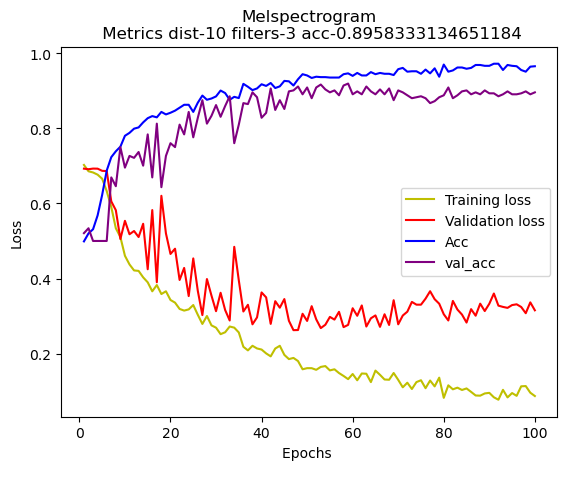

In [73]:
#graficar las metricas
graph_metrics(history,
              'Melspectrogram\n Metrics dist-' 
              + dist 
              + ' filters-' 
              + str(len(filters))
              + ' acc-'
              + str(metrics[1])
             )
